In [6]:
import pandas as pd

df=pd.read_csv('SVM_Dataset1.csv', index_col=0)

In [7]:
df

,x1,x2,y
0,2.947814,6.626878,1
1,2.530388,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1
5,2.155826,6.222343,-1
6,3.273418,3.520687,-1


In [8]:
import numpy as np
x1=df['x1']
x2=df['x2']
x_train=np.array(list(zip(x1,x2)))

print(x_train)

[[2.947814 6.626878]
 [2.530388 7.78505 ]
 [3.566991 5.651046]
 [3.156983 5.467077]
 [2.582346 4.457777]
 [2.155826 6.222343]
 [3.273418 3.520687]]


In [9]:
y_train=df['y'].values

print(y_train)

[ 1  1  1  1 -1 -1 -1]


In [12]:
color_ls = []
# if y == 1, then the value at the same index in color_ls will be 'b'
# otherwise, it will be 'r'
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
print(color_ls)

label = []
# if y == 1, then the value at the same index in label will be 'H'
# otherwise, it will be 'NH'
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')

print(label)

['b', 'b', 'b', 'b', 'r', 'r', 'r']
['H', 'H', 'H', 'H', 'NH', 'NH', 'NH']


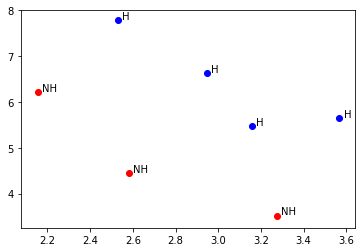

In [15]:
import matplotlib.pyplot as plt

# k is our index, (i,j) are our Serotonin and Dopamine pairings.
# For example, here are the values on the first iteration of the loop:
# k == 0, (i, j) == (2.947814, 6.626878)
for k, (i,j) in enumerate(x_train):
    # add the datapoint to a scatter plot,
    # using the k'th color in colors_ls
    plt.scatter(i, j, c = color_ls[k])
    # 0.02 to the right and above the point,
    # add the k'th text label in label
    plt.text(i+0.02, j+0.02, label[k])

In [20]:
from sklearn import svm

# svm_classifier = svm.SVC(kernel='poly',C=1, degree=2)

# We want to use a linear classification
svm_classifier = svm.SVC(kernel='linear', C=10)
# find the best fit line
svm_classifier.fit(x_train, y_train)

SVC(C=10, kernel='linear')

In [1]:
def plot_decision_boundary(clf, x, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

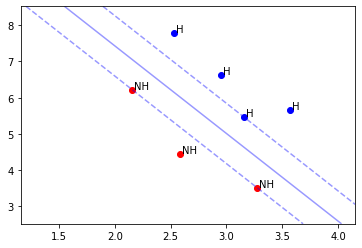

In [23]:
# pass in the trained model and data points,
# and plot the best fit line + margins
plot_decision_boundary(svm_classifier, x_train, y_train)

# plot data points + color/labels
for k, (i,j) in enumerate(x_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

In [24]:
# Obtain the slope (weight) and intercept for the best fit line equation: 

# a + b
weight=svm_classifier.coef_
# c
intercept=svm_classifier.intercept_
print(weight)
print(intercept)

[[2.90336685 1.20121959]]
[-14.73321143]


In [25]:
print(weight[0][0]*3+weight[0][1]*5+intercept[0])
print(weight[0][0]*2+weight[0][1]*7.5+intercept[0])

-0.017012931258699737
0.08266919494858271
